Summary on online property findings

In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from property import *
from accumulate_data import *

In [5]:
%run accumulate_data.py


0it [00:00, ?it/s]
 17%|█████████████▊                                                                     | 3/18 [00:19<01:46,  7.07s/it]

`https://ingatlan.com/algyo/elado+haz/tanya/csongrad+megye+algyo/30454234` has some issues to provide advertiser details!



 39%|████████████████████████████████▎                                                  | 7/18 [00:37<00:55,  5.08s/it]

`https://ingatlan.com/algyo/elado+haz/csaladi-haz/csongrad+megye+algyo+kerekes+utca/30909907` has some issues to provide advertiser details!



 44%|████████████████████████████████████▉                                              | 8/18 [00:41<00:48,  4.82s/it]

`https://ingatlan.com/algyo/elado+haz/csaladi-haz/csongrad+megye+algyo+kerekes+utca/30893557` has some issues to provide advertiser details!



  8%|██████▏                                                                            | 3/40 [00:16<03:38,  5.89s/it]

`https://ingatlan.com/morahalom/elado+haz/csaladi-haz/csongrad+megye+morahalom+szegedi+ut/29735999` has some issues to provide advertiser details!



 10%|████████▎                                                                          | 4/40 [00:20<03:18,  5.52s/it]

`https://ingatlan.com/morahalom/elado+haz/csaladi-haz/csongrad+megye+morahalom+tancsics+mihaly+utca/29669168` has some issues to provide advertiser details!



 18%|██████████████▌                                                                    | 7/40 [00:34<02:38,  4.82s/it]

`https://ingatlan.com/morahalom/elado+haz/csaladi-haz/csongrad+megye+morahalom/29373212` has some issues to provide advertiser details!



 20%|████████████████▌                                                                  | 8/40 [00:39<02:36,  4.89s/it]

`https://ingatlan.com/morahalom-varoskozpont/elado+haz/csaladi-haz/csongrad+megye+morahalom/29142074` has some issues to provide advertiser details!



 22%|██████████████████▋                                                                | 9/40 [00:43<02:23,  4.63s/it]

`https://ingatlan.com/morahalom/elado+haz/tanya/csongrad+megye+morahalom/28844255` has some issues to provide advertiser details!



 35%|████████████████████████████▋                                                     | 14/40 [01:06<02:01,  4.67s/it]

`https://ingatlan.com/morahalom-felsovaros/elado+haz/tanya/csongrad+megye+morahalom/24964600` has some issues to provide advertiser details!



 38%|██████████████████████████████▊                                                   | 15/40 [01:11<01:59,  4.79s/it]

`https://ingatlan.com/morahalom/elado+haz/csaladi-haz/csongrad+megye+morahalom+egyenloseg+utca/24183073` has some issues to provide advertiser details!



 68%|███████████████████████████████████████████████████████▎                          | 27/40 [02:05<00:56,  4.32s/it]

`https://ingatlan.com/morahalom/elado+haz/csaladi-haz/csongrad+megye+morahalom+zrinyi+utca/30742816` has some issues to provide advertiser details!



 49%|███████████████████████████████████████▋                                         | 49/100 [02:37<02:43,  3.21s/it]


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



  1%|▊                                                                                 | 1/100 [00:07<12:32,  7.60s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



  2%|█▋                                                                                | 2/100 [00:12<10:50,  6.64s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+vasas+szent+peter+utca/30766795` has some issues to provide advertiser details!



  3%|██▍                                                                               | 3/100 [00:16<09:39,  5.98s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



  4%|███▎                                                                              | 4/100 [00:21<09:08,  5.71s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



  5%|████                                                                              | 5/100 [00:25<08:26,  5.33s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



  6%|████▉                                                                             | 6/100 [00:30<07:56,  5.07s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



  7%|█████▋                                                                            | 7/100 [00:34<07:25,  4.79s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



  8%|██████▌                                                                           | 8/100 [00:39<07:11,  4.69s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



  9%|███████▍                                                                          | 9/100 [00:43<06:56,  4.58s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 10%|████████                                                                         | 10/100 [00:48<06:55,  4.61s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 11%|████████▉                                                                        | 11/100 [00:52<06:41,  4.52s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 12%|█████████▋                                                                       | 12/100 [00:57<06:44,  4.59s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 13%|██████████▌                                                                      | 13/100 [01:01<06:29,  4.48s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 14%|███████████▎                                                                     | 14/100 [01:05<06:17,  4.38s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+szent+ferenc+utca+23/30660700` has some issues to provide advertiser details!



 15%|████████████▏                                                                    | 15/100 [01:10<06:18,  4.45s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+romai+korut/30658432` has some issues to provide advertiser details!



 16%|████████████▉                                                                    | 16/100 [01:14<06:06,  4.36s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 17%|█████████████▊                                                                   | 17/100 [01:18<05:59,  4.33s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 18%|██████████████▌                                                                  | 18/100 [01:22<05:51,  4.28s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 19%|███████████████▍                                                                 | 19/100 [01:27<05:49,  4.32s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 20%|████████████████▏                                                                | 20/100 [01:31<05:50,  4.38s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+kemes+utca/30575224` has some issues to provide advertiser details!



 21%|█████████████████                                                                | 21/100 [01:37<06:28,  4.91s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 22%|█████████████████▊                                                               | 22/100 [01:42<06:18,  4.86s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+rona+utca/30568288` has some issues to provide advertiser details!



 23%|██████████████████▋                                                              | 23/100 [01:46<06:04,  4.74s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 24%|███████████████████▍                                                             | 24/100 [01:51<06:03,  4.78s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/teremgarazs/csongrad+megye+szeged+tompai+kapu+ut+2b/30521851` has some issues to provide advertiser details!



 25%|████████████████████▎                                                            | 25/100 [01:56<05:57,  4.77s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 26%|█████████████████████                                                            | 26/100 [02:01<05:58,  4.85s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+romai+korut/30437149` has some issues to provide advertiser details!



 27%|█████████████████████▊                                                           | 27/100 [02:06<05:49,  4.79s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+kalvaria+sugarut+92-94/30434056` has some issues to provide advertiser details!



 28%|██████████████████████▋                                                          | 28/100 [02:11<05:44,  4.79s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 29%|███████████████████████▍                                                         | 29/100 [02:15<05:33,  4.70s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 30%|████████████████████████▎                                                        | 30/100 [02:20<05:30,  4.72s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 31%|█████████████████████████                                                        | 31/100 [02:24<05:17,  4.60s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+dugonics+utca/30335507` has some issues to provide advertiser details!



 32%|█████████████████████████▉                                                       | 32/100 [02:28<05:04,  4.48s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 33%|██████████████████████████▋                                                      | 33/100 [02:34<05:17,  4.74s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+fakopancs+utca/30314270` has some issues to provide advertiser details!



 34%|███████████████████████████▌                                                     | 34/100 [02:38<05:03,  4.61s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 35%|████████████████████████████▎                                                    | 35/100 [02:43<05:12,  4.81s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 36%|█████████████████████████████▏                                                   | 36/100 [02:48<05:00,  4.69s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+allomas+utca/30046589` has some issues to provide advertiser details!



 37%|█████████████████████████████▉                                                   | 37/100 [02:52<04:44,  4.52s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+tisza+lajos+korut+18-20/29968853` has some issues to provide advertiser details!



 38%|██████████████████████████████▊                                                  | 38/100 [02:56<04:32,  4.40s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 39%|███████████████████████████████▌                                                 | 39/100 [03:00<04:25,  4.35s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 40%|████████████████████████████████▍                                                | 40/100 [03:04<04:18,  4.31s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 41%|█████████████████████████████████▏                                               | 41/100 [03:10<04:40,  4.76s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 42%|██████████████████████████████████                                               | 42/100 [03:14<04:28,  4.63s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 43%|██████████████████████████████████▊                                              | 43/100 [03:19<04:18,  4.53s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 44%|███████████████████████████████████▋                                             | 44/100 [03:23<04:07,  4.42s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged/29773289` has some issues to provide advertiser details!



 45%|████████████████████████████████████▍                                            | 45/100 [03:27<03:58,  4.34s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 46%|█████████████████████████████████████▎                                           | 46/100 [03:31<03:53,  4.33s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 47%|██████████████████████████████████████                                           | 47/100 [03:35<03:43,  4.22s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 48%|██████████████████████████████████████▉                                          | 48/100 [03:40<03:39,  4.23s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 49%|███████████████████████████████████████▋                                         | 49/100 [03:44<03:37,  4.27s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 50%|████████████████████████████████████████▌                                        | 50/100 [03:48<03:31,  4.23s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+hajnal+utca/29467505` has some issues to provide advertiser details!



 51%|█████████████████████████████████████████▎                                       | 51/100 [03:52<03:25,  4.20s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
Could not click on phone number
`https://ingatlan.com/szeged-alsovaros/elado+garazs/onallo/csongrad+megye+szeged/29451062` has some issues to provide advertiser details!



 52%|██████████████████████████████████████████                                       | 52/100 [03:56<03:18,  4.13s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 53%|██████████████████████████████████████████▉                                      | 53/100 [04:01<03:23,  4.33s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 54%|███████████████████████████████████████████▋                                     | 54/100 [04:05<03:13,  4.21s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 55%|████████████████████████████████████████████▌                                    | 55/100 [04:09<03:03,  4.08s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 56%|█████████████████████████████████████████████▎                                   | 56/100 [04:13<03:02,  4.14s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 57%|██████████████████████████████████████████████▏                                  | 57/100 [04:17<03:00,  4.19s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 58%|██████████████████████████████████████████████▉                                  | 58/100 [04:21<02:53,  4.13s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+veres+acs+utca+49/29216258` has some issues to provide advertiser details!



 59%|███████████████████████████████████████████████▊                                 | 59/100 [04:26<02:53,  4.23s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 60%|████████████████████████████████████████████████▌                                | 60/100 [04:30<02:45,  4.15s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 61%|█████████████████████████████████████████████████▍                               | 61/100 [04:34<02:44,  4.21s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 62%|██████████████████████████████████████████████████▏                              | 62/100 [04:38<02:39,  4.19s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 63%|███████████████████████████████████████████████████                              | 63/100 [04:42<02:31,  4.09s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 64%|███████████████████████████████████████████████████▊                             | 64/100 [04:47<02:33,  4.26s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+sik+sandor+utca/28372364` has some issues to provide advertiser details!



 65%|████████████████████████████████████████████████████▋                            | 65/100 [04:51<02:30,  4.30s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged-rokus/elado+garazs/onallo/csongrad+megye+szeged/28341062` has some issues to provide advertiser details!



 66%|█████████████████████████████████████████████████████▍                           | 66/100 [04:55<02:20,  4.12s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 67%|██████████████████████████████████████████████████████▎                          | 67/100 [04:59<02:14,  4.08s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 68%|███████████████████████████████████████████████████████                          | 68/100 [05:03<02:12,  4.13s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 69%|███████████████████████████████████████████████████████▉                         | 69/100 [05:07<02:04,  4.01s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 70%|████████████████████████████████████████████████████████▋                        | 70/100 [05:11<02:00,  4.02s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [05:15<01:57,  4.05s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [05:19<01:51,  3.99s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [05:23<01:45,  3.92s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [05:29<02:01,  4.69s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [05:33<01:52,  4.52s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [05:37<01:43,  4.31s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [05:41<01:35,  4.16s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [05:45<01:30,  4.11s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [05:49<01:26,  4.10s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [05:53<01:22,  4.15s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [05:57<01:17,  4.09s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [06:01<01:13,  4.06s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [06:07<01:16,  4.52s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 84%|████████████████████████████████████████████████████████████████████             | 84/100 [06:11<01:09,  4.37s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [06:15<01:04,  4.32s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [06:19<01:00,  4.30s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [06:23<00:53,  4.11s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+halo+utca/30951286` has some issues to provide advertiser details!



 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [06:27<00:49,  4.09s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+gondor+sor+j/30925450` has some issues to provide advertiser details!



 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [06:31<00:45,  4.10s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+halo+utca/30918352` has some issues to provide advertiser details!



 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [06:35<00:40,  4.04s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+szovetkezeti+ut/30914362` has some issues to provide advertiser details!



 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [06:39<00:36,  4.05s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [06:43<00:32,  4.10s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [06:47<00:28,  4.13s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+debreceni+utca/30890884` has some issues to provide advertiser details!



 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [06:52<00:25,  4.23s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [06:56<00:20,  4.12s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [07:00<00:16,  4.10s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found
`https://ingatlan.com/szeged/elado+garazs/onallo/csongrad+megye+szeged+rona+utca/30845398` has some issues to provide advertiser details!



 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [07:04<00:12,  4.12s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [07:08<00:08,  4.16s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [07:12<00:04,  4.17s/it]

`{'class': 'parameter-value'}` is not found
`{'class': 'parameter-value'}` is not found



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:16<00:00,  4.05s/it]C:\Users\divekizs\Python\Scripts\Property-finder\accumulate_data.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  {'city': 'Morahalom', 'property_type': 'haz', 'sale_type': 'elado'},


AttributeError: 'NoneType' object has no attribute 'groupby'

In [13]:
def read_historical_data(fname):
    av_hist = pd.read_excel(fname)
    av_hist = av_hist.set_index('Date')
    colnames = av_hist.columns
    return av_hist, colnames


In [17]:
av_hist, avhist_colnames = read_historical_data('averages.xlsx')

### Calculate stats on the properties
av = get_averages(df)
av = av.loc[:,avhist_colnames]


In [19]:
av = pd.concat([av_hist, av], sort=False)


In [20]:
av

,city,type,size,street,price,unit_price,land_size,garage
Date,,,,,,,,
2020-01-11 21:12:52.639000,Algyo,House,118.882353,NaN,3.000294e+07,278100.389936,NaN,NaN
2020-01-11 21:12:52.639000,Morahalom,House,118.179487,NaN,2.486410e+07,215486.314279,NaN,NaN
2020-01-11 21:12:52.639000,Szeged,Garage,17.755102,NaN,4.165918e+06,242099.910224,NaN,NaN
2020-01-11 21:12:52.639000,Szeged,House,160.991162,NaN,5.492939e+07,992379.652400,470.023990,NaN
2020-01-12 18:35:12.534301,Algyo,House,118.882353,NaN,3.000294e+07,278100.389936,523.470588,NaN
2020-01-12 18:35:12.534301,Morahalom,House,117.475000,NaN,2.473250e+07,215543.600866,157.050000,NaN
2020-01-12 18:35:12.534301,Szeged,Garage,17.727273,NaN,4.149091e+06,241337.958269,NaN,NaN


# Property characteristics over time

## Average house prices

In [ ]:
# average price per property
avp_house = pd.pivot(av[av.type=='House'].reset_index(), index='Date', values='price', columns='city')
avp_flat  = pd.pivot(av[av.type=='Flat'].reset_index(), index='Date', values='price', columns='city')
avp_garage= pd.pivot(av[av.type=='Garage'].reset_index(), index='Date', values='price', columns='city')

# average price per sqmeter
avpm_house = pd.pivot(av[av.type=='House'].reset_index(), index='Date', values='unit_price', columns='city')
avpm_flat  = pd.pivot(av[av.type=='Flat'].reset_index(), index='Date', values='unit_price', columns='city')
avpm_garage= pd.pivot(av[av.type=='Garage'].reset_index(), index='Date', values='unit_price', columns='city')

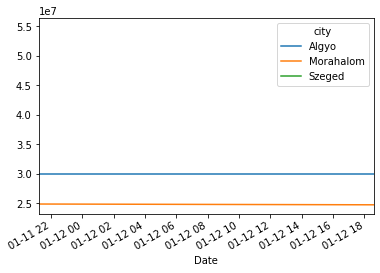

In [26]:
fig, axes = plt.subplots(2, 2)
av_price.plot()

## Average flat prices

In [ ]:
av_price=pd.pivot(av[av.type=='Flat'].reset_index(), index='Date', values='price', columns='city')
av_price.plot()

In [1]:
df.head()

NameError: name 'df' is not defined